
<font size = "5"> **Chapter 2: [Diffraction](CH2_00-Diffraction.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

# Unic Cell Determination and Stereographic Projection

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM//main/Diffraction/CH2_09-Unit_Cell.ipynb)
 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main/Diffraction/CH2_09-Unit_Cell.ipynb)



part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

by Gerd Duscher, Spring 2021

Microscopy Facilities<br>
Joint Institute of Advanced Materials<br>
Materials Science & Engineering<br>
The University of Tennessee, Knoxville

Background and methods to analysis and quantification of data acquired with transmission electron microscopes


## Load relevant python packages
### Check Installed Packages

In [4]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = get_distribution(package_name).version
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version

# Colab setup ------------------
if 'google.colab' in sys.modules:
    !pip install pyTEMlib -q
# pyTEMlib setup ------------------
else:
    if test_package('pyTEMlib') < '0.2021.3.17':
        print('installing pyTEMlib')
        !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

installing pyTEMlib
done


## Import numerical and plotting python packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,

and some libraries from pyTEMlib
* kinematic scattering library.
* animation 

In [1]:
# import matplotlib and numpy
#                       use "inline" instead of "notebook" for non-interactive plots
import sys
if 'google.colab' in sys.modules:
    %pylab --no-import-all inline
else:
    %pylab --no-import-all notebook
    
# additional package 
import  itertools 
from matplotlib import patches

# Import libraries from pyTEMlib
import pyTEMlib
import pyTEMlib.KinsCat as ks         # Kinematic sCattering Library
                             # Atomic form factors from Kirklands book
from pyTEMlib import animation        # Provide some functions to plot schematic plots
__notebook_version__ = '2021.02.16'
print('pyTEM version: ', pyTEMlib.__version__)
print('notebook version: ', __notebook_version__)

Populating the interactive namespace from numpy and matplotlib
Using KinsCat library version  0.5  by G.Duscher
spglib not installed; Symmetry functions of spglib disabled
pyTEM version:  0.2021.02.17
notebook version:  2021.02.16


C:\Users\gduscher\Anaconda3\lib\site-packages\pyUSID\viz\__init__.py:16: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  warn('Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. '


## Unit Cell Determination

- The HOLZ rings will give the lattice repeat vector (reciprocal vector parallel to the zone axis).
- So tilting in [001] zone axis, the ZOLZ pattern will give you the [100] and [010] distance  
- and the HOLZ ring radius the [001] distance.

> **This is the determination of the lattice parameter of a unit cell.**
>
>Thus, we see that one can determine 3D information from a single two dimensional pattern. 
>
>It might be necessary to use other low order zone axes.

### Measurements

- Record HOLZ and ZOLZ patterns, if possible in one picture (use double illumination with different exposure times to enhance dynamic range), but with different convergence angles.
- If the angle of the ring is too large then your measurements may suffer from lens distortions.
- If the HOLZ ring is split measure the inner one.

### Z-Component of Unit Cell

If $H$ is the distance between the reciprocal-lattice planes parallel to the beam and $G_n$ is the projected radius of the HOLZ ring, then 
\begin{eqnarray}
G_1&=& \left( \frac{2H}{\lambda}\right)^{1/2} = \sqrt{\frac{2H}{\lambda}}\\
G_2&=& 2\left( \frac{H}{\lambda}\right)^{1/2} = 2 \sqrt{\frac{H}{\lambda}}
\end{eqnarray}
for FOLZ and SOLZ. 

Similar expressions can be developed for higher order HOLZ rings.

In real space you get for example for FOLZ:
\begin{equation}
\frac{1}{H}=\frac{2}{\lambda G_1^2} = \frac{2}{\lambda} \left(\frac{\lambda L}{r}\right)^{2}
\end{equation}

If you did use a zone axis which is not ${100}$, then you have to compare your result to calculated values.

Assuming you are looking down $[UVW]$ then we know:
\begin{equation}
\frac{1}{H}= |[UVW]|
\end{equation}

Now we have to calculate this $|[UVW]|$ for different structures:\\
#### for fcc:
\begin{equation}
\frac{1}{H}= \frac{a_0}{p(U^2+V^2+W^2)}
\end{equation}
with $a_0$ is the lattice parameter and $p=1$ for $U+V+W$ is odd; $p=2$ for $U+V+W$ is even.


#### for bcc:
the same relationship as for fcc is true for bcc but $p$ is different:  $p=2$ for $U$, $V$, and $W$ all odd; $p=1$ otherwise.


Look up other crystal systems.

If a ring is forbidden: you have to multiply your measurement $1/H_m$ with an integer $n$ to obtain the distance of the crystal.


## Lattice Centering

We are going to look at cubic structures to 
- fcc
- bcc 
- a-face
- b-face
- primitive or simple cubic

The maximal excitation error is chosen so that ZOLZ and FOLZ overlap and we can see the different centering 

<IPython.core.display.Javascript object>


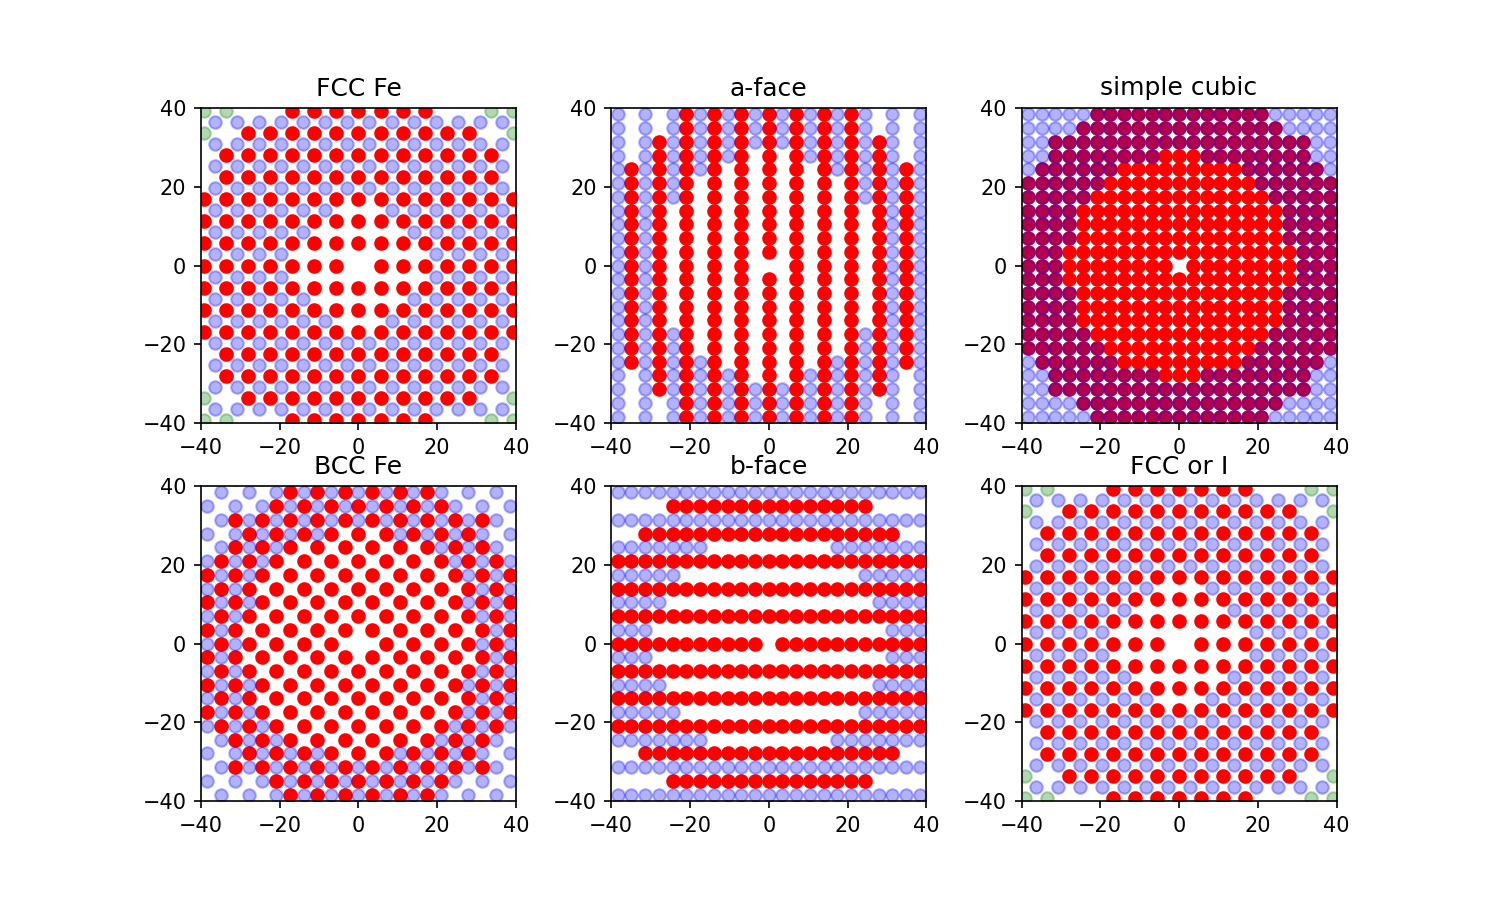

In [2]:
def plot_spots(tags, ax):
    """Simple plotting for spot pattern"""
    
    points = tags['allowed']['g']
    ix = np.argsort((points**2).sum(axis=1))
    p = points[ix]
    Laue_zones = np.unique(p[:,2])     
    ZOLZ = np.where(p[:,2] == Laue_zones[0])
    FOLZ = np.where(p[:,2] == Laue_zones[1])
    SOLZ = np.where(p[:,2] == Laue_zones[2])

    ax.scatter(p[ZOLZ,0], p[ZOLZ,1], color='red')
    ax.scatter(p[FOLZ,0], p[FOLZ,1], color='blue', alpha = 0.3)
    ax.scatter(p[SOLZ,0], p[SOLZ,1], color='green', alpha = 0.3)

    ax.set_aspect('equal')
    ax.set_title(tags['crystal_name'])
    ax.set_xlim(-40,40)
    ax.set_ylim(-40,40)
    
# load structure
tags = ks.structure_by_name('FCC Fe')

# add necessary parameters for kinematic scattering calculation
tags['acceleration_voltage_V'] = 200000
tags['convergence_angle_mrad'] = 0
tags['zone_hkl'] = [0, 0, 1] # incident neares zone axis: defines Laue Zones!!!!
tags['mistilt']  = np.array([0,0,0])  # mistilt in degrees

tags['Sg_max'] = 2.5 # 1/nm  maximum allowed excitation error ; This parameter is related to the thickness
tags['hkl_max'] = 15   # Highest evaluated Miller indices
# calulcuate kinematic scattering data
ks.kinematic_scattering(tags, False)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(10,6))


# plot diffraction pattern
plot_spots(tags, ax[0, 0])
tags['crystal_name'] = 'FCC or I'
plot_spots(tags, ax[1, 2])


tags.update(ks.structure_by_name('BCC Fe'))
ks.kinematic_scattering(tags, False)

# plot diffraction pattern
plot_spots(tags, ax[1, 0])

tags['crystal_name'] = 'a-face'
tags['base'] = np.array([[0. , 0. , 0. ], [0, 1/2, 1/2]])
ks.kinematic_scattering(tags, False)
plot_spots(tags, ax[0, 1])

tags['crystal_name'] = 'b-face'
tags['base'] = np.array([[0. , 0. , 0. ], [1/2, 0, 1/2]])
ks.kinematic_scattering(tags, False)
plot_spots(tags, ax[1, 1])

tags['crystal_name'] = 'simple cubic'
tags['base'] = np.array([[0. , 0. , 0. ]])
tags['elements'] = ['Fe']
ks.kinematic_scattering(tags, False)
plot_spots(tags, ax[0, 2])



To analyse an experimental pattern: 

- Extend the pattern for the ZOLZ into the HOLZ ring and look for discrepancies. 

## Laue Circle

The mistilt (angles in degrees) leads to a circular pattern in the ZOLZ.

Any mistilt will cause the Ewald sphere to cut through the projection plane in a circle:
the Laue circle. The maximal excitation error $S_{g_{max}}$ has to be rather small for this effect to appear.

The nearest zone axis will always be in the middle of the Laue circle.

If you encounter such a Laue circle try to minimize the circle by tilting towards the center.
You can try this out below in rhe

<IPython.core.display.Javascript object>


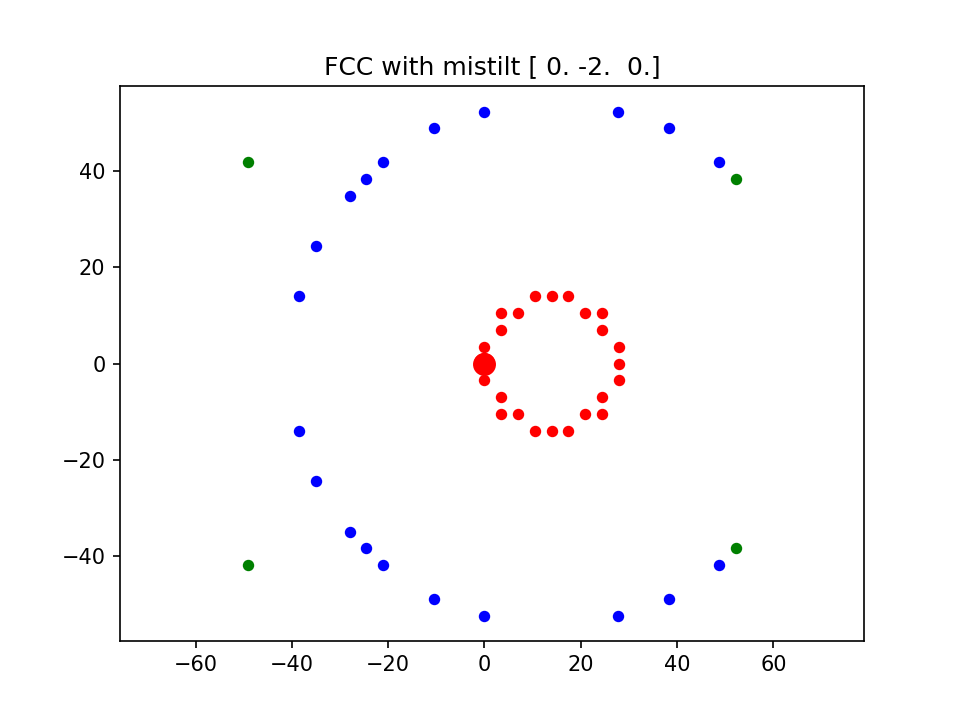

In [3]:
# -----Input ----------
tags['mistilt']  = np.array([0., -2 , 0])
tags['Sg_max'] = .05 # 1/nm  maximum allowed excitation error ; This parameter is related to the thickness
# ---------------------

# add necessary parameters for kinematic scattering calculation
tags['acceleration_voltage_V'] = 200000
tags['convergence_angle_mrad'] = 0
tags['zone_hkl'] = [0, 0, 1] # incident neares zone axis: defines Laue Zones!!!!
 
tags['crystal_name'] = f"FCC with mistilt {tags['mistilt']}"
ks.kinematic_scattering(tags, False)
ks.plotSAED(tags)

The next graph shows a cross section through the reciprocal space (with Ewald sphere).

The tilt out of zone axis (blue) leaves some spots in the middle with an high excitation error $s_g$ larger than the maximum allowed one. These spots (in the figure from 2 1/nm to 8 1/nm) are invisible in such a case. Because the Ewald sphere is a 3D object the cut of a sphere with a plane will give a circle. 


<IPython.core.display.Javascript object>


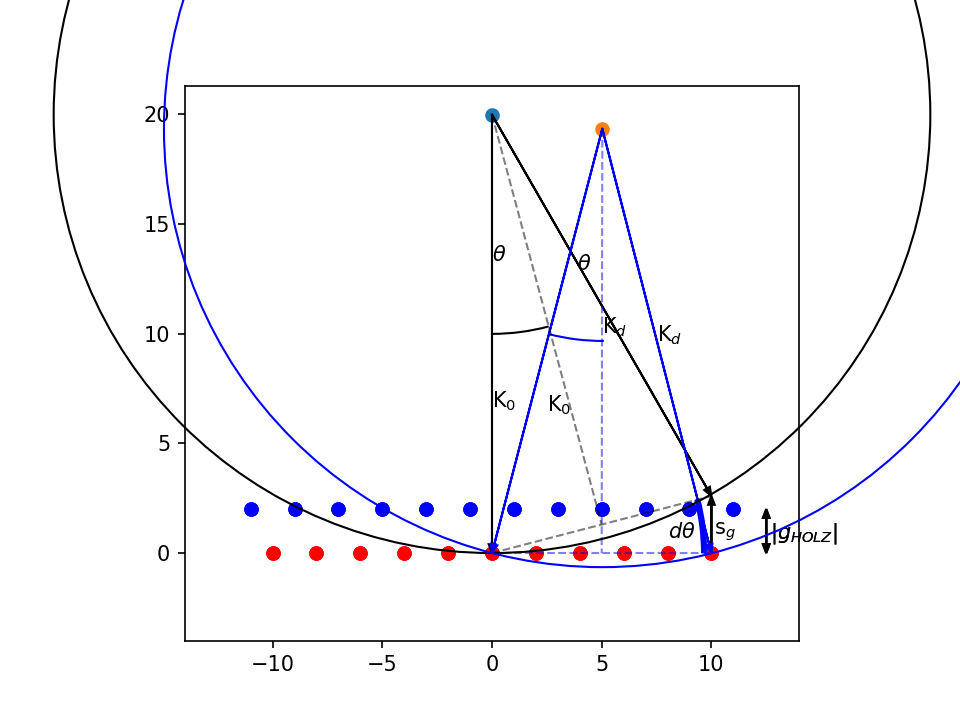

In [4]:

plt.figure()
animation.deficient_holz_line(exact_bragg=False, laue_zone=0, color='black')
animation.deficient_holz_line(exact_bragg=True, laue_zone=0, color='blue')

## Stereographic Projection
There are a lot of problems in materials science you can solve with diffraction patterns in the TEM.

 For instance the orientation relationship two crystals have to each other. What is the grain boundary plane and so on.

The method to visualize such orientation relationships is the stereographic projection.


### Construction 

The Schematic below shows the construction of  **Stereographic Projection** for cubic systems.

Draw the crystal in the middle of a sphere. Draw a line from the center of the sphere through the middle of each plane (must be normal to the plane). Mark where this line intersects the sphere (it is named P in figure above). From this point draw a line to the south or north pole so that you intersect the equatorial plane. If you have to go to the south pole, mark the intersection of this line with equatorial plane with a dot;
if you go to the north pole mark this intersection with a circle.We construct the point P'. This point represents uniquely one plane. The relevant area of the equatorial plane is a disk. 

Now we can also project circumference of a circle. Note that all the planes perpendicular to a low order zone axis lay on such a circle. These circles show up as lines or as ovals in the stereographic projection .

Change the Miller indices to see the change 

projected x-coordinate is 37.28 degree


<IPython.core.display.Javascript object>


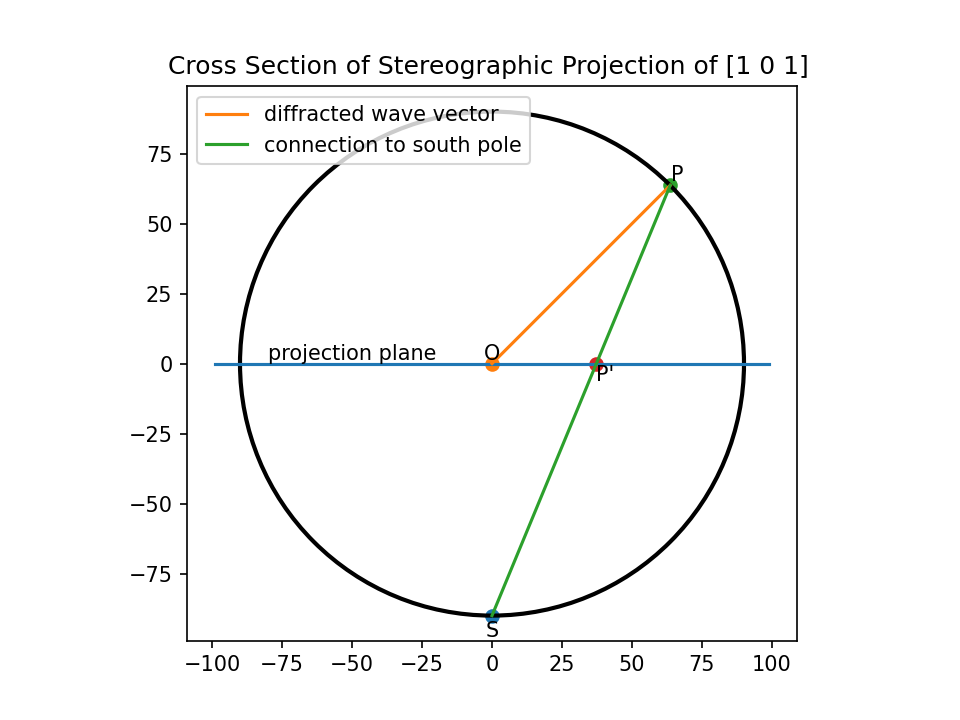

In [5]:
# ------Input ----------
reflection = np.array([1,0, 1])
# -----------------------
if reflection[1] != 0:
    print('we only use a cross section so y is set to 0')
    reflection[1] = 0

R = 90 # 90 degrees projection sphere
x,y,z =reflection/np.linalg.norm(reflection)*R # Coordinates on sphere surface
x_projeted = (x*R/(R+z)) # x coordinate on stereographic projection plane
print(f'projected x-coordinate is {x_projeted:.2f} degree')

plt.figure()
plt.title(f'Cross Section of Stereographic Projection of {reflection} ')
sphere = plt.Circle(( 0. , 0. ), R , fill=False, linewidth=2) 
plt.gca().set_aspect( 'equal') 
plt.gca().add_artist(sphere) 

plt.plot([-R*1.1,R*1.1], [0,0])
plt.text(0.04, 0, 'O', horizontalalignment='center', verticalalignment='bottom')
plt.text(-50, 0, 'projection plane', horizontalalignment='center', verticalalignment='bottom')
plt.ylim(-R*1.1,R*1.1)
plt.scatter(0,-R)
plt.text(0,-R*1.02, 'S', horizontalalignment='center', verticalalignment='top')
plt.scatter(0,0)

plt.plot([0, x], [0, z], label='diffracted wave vector') 
plt.scatter(x, z)
plt.text(x*1.04, z, 'P', horizontalalignment='center', verticalalignment='bottom')

plt.plot([x, 0], [z, -R], label='connection to south pole') 
plt.scatter(x_projeted, 0)
plt.text(x_projeted, -0.4, 'P\'', horizontalalignment='left', verticalalignment='top', )
plt.legend(loc='upper left');

**Some features of the stereographic projection:**
    
- We can represent plane normals and directions in the same projection.
- The can read off the angles between the directions, because the angles are preserved in this projection. Possibly the most important feature of this projection.
- The zone axis is always 90$^{\rm o} $ away from any plane normal to its zone.
- All the planes normal to a particular zone will lay on a great circle (oval). The zone of the centrale pole is on the circumference of the whole projection.
- The angle between two planes is the angle between their normals measured with the Wulff net.
- We can add the symmetry elements of any particular crystal system. 

### Wulff Plot

The result of the stereographic Projection of the holeprojeciton sphere is shown below. It is convenient to show the ** circles of the sphere** as a grid the Wulff Plot. 

But first we define some helper functions.

In [6]:
## ## Some helper functions first
def circumcenter(a,b,c):
    ax, ay = a
    bx, by = b
    cx, cy = c
    d = 2 * (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by))
    ux = ((ax * ax + ay * ay) * (by - cy) + (bx * bx + by * by) * (cy - ay) + (cx * cx + cy * cy) * (ay - by)) / d
    uy = ((ax * ax + ay * ay) * (cx - bx) + (bx * bx + by * by) * (ax - cx) + (cx * cx + cy * cy) * (bx - ax)) / d
    return (ux, uy)

def wulff_net(ax, density=10):
    
    outer_ring = plt.Circle(( 0. , 0. ), 90 , fill=False, linewidth=2) 

    ax.set_aspect( 'equal') 
    ax.add_artist( outer_ring ) 
    ax.spines['left'].set_position(('data', 0))
    ax.spines['bottom'].set_position(('data', 0))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    ax.set_xlim(-94,94)
    ax.set_ylim(-94,94)
    
    for phi in range(density,90,density):
        phi_r = np.radians(phi)
        x,y = 90*np.sin(phi_r), 90*np.cos(phi_r)
        u,v = circumcenter([x,y],[-x,y],[0,90-phi])
        theta = np.degrees(np.arctan2( y-v, x-u))
        ax.add_patch(patches.Arc((0. , v), (v-90+phi)*2, (v-90+phi)*2, fill=False, edgecolor = 'gray', linewidth=.5, theta1=180-theta , theta2=theta))
        ax.add_patch(patches.Arc((0. , -v), (v-90+phi)*2, (v-90+phi)*2, fill=False, edgecolor = 'gray', linewidth=.5, theta1=-theta , theta2=180+theta))
        u,v = circumcenter([0,90],[0,-90],[phi,0])
        theta = np.degrees(np.arctan2(u, phi))
        radius = np.sqrt(u**2+ 90**2)
        
        theta = np.degrees(np.arctan2(  90, u))
        radius = np.abs(u-phi)
        ax.add_patch(patches.Arc((u, 0), radius*2, radius*2, fill=False, edgecolor = 'gray', linewidth=.5, theta1=180+theta , theta2=-180-theta))
        ax.add_patch(patches.Arc((-u, 0), radius*2, radius*2, fill=False, edgecolor = 'gray', linewidth=.5, theta1=theta , theta2=-theta))

    
def add_main_circles(ax):
    phi = 45
    phi_r = np.radians(phi)
    x,y = 90*np.sin(phi_r), 90*np.cos(phi_r)

    ax.plot([x,-x], [y,-y], color='blue')
    ax.plot([x,-x], [-y,y], color='blue')

    phi_r = np.radians(phi)
    x,y = 90*np.sin(phi_r), 90*np.cos(phi_r)
    u,v = circumcenter([x,y],[-x,y],[0,90-phi])
    theta = np.degrees(np.arctan2( y-v, x-u))
    ax.add_patch(patches.Arc((0., 90), np.sqrt(2)*180, np.sqrt(2)*180, fill=False, edgecolor = 'blue', linewidth=1, theta1=180+45 , theta2=-45))
    ax.add_patch(patches.Arc((0., -90), np.sqrt(2)*180, np.sqrt(2)*180, fill=False, edgecolor = 'blue', linewidth=1, theta1=45, theta2=180-45))
    ax.add_patch(patches.Arc((90., 0), np.sqrt(2)*180, np.sqrt(2)*180, fill=False, edgecolor = 'blue', linewidth=1, theta1=180-45, theta2=180+45))
    ax.add_patch(patches.Arc((-90., 0), np.sqrt(2)*180, np.sqrt(2)*180, fill=False, edgecolor = 'blue', linewidth=1, theta1=-45 , theta2=45))




Again change the Miller indices around to see where the reflections *lands*.

Projected coordinates: [62.54886934 20.84962311]


<IPython.core.display.Javascript object>


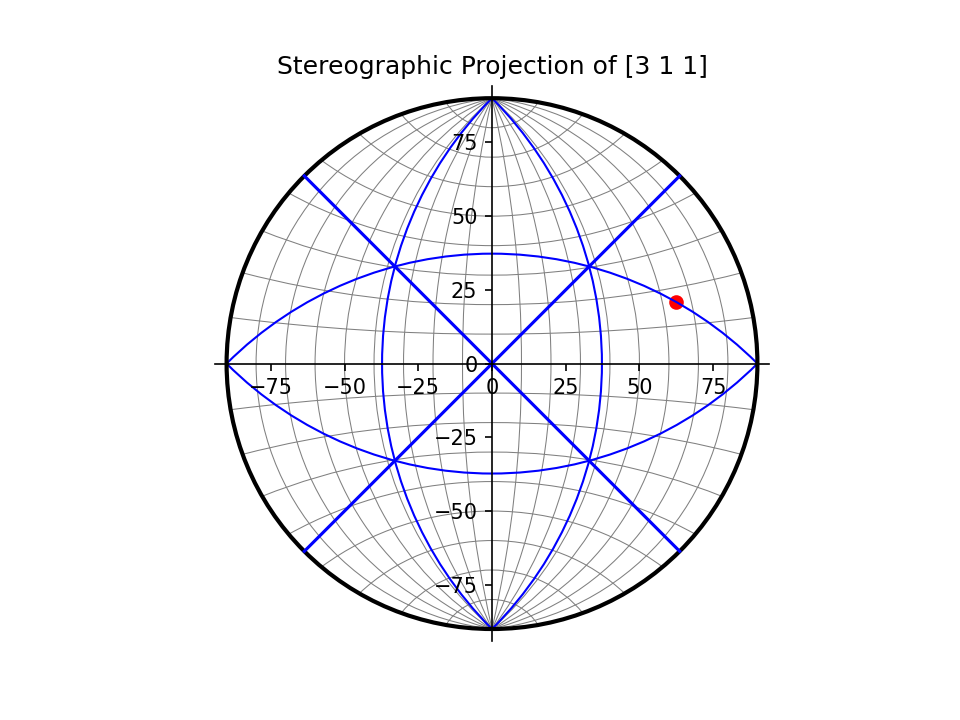

In [7]:
# ------Input ----------
reflection = np.array([3, 1, 1])
# -----------------------
R = 90 # 90 degrees Ewald sphere
projected =(reflection/np.linalg.norm(reflection)*R) # Coordinates on ewals sphere surface

projected = projected*R/(R+projected[2]) # x coordinate on stereographic projection plane
if projected[2]>=0:
    print(f'Projected coordinates: {projected[:2]}')
else:
    print('negative l Miller index is not supported')
plt.figure()
plt.title(f'Stereographic Projection of {reflection}')
wulff_net(plt.gca(), density=10)
add_main_circles(plt.gca())
if projected[2]>=0:
    plt.scatter(projected[0], projected[1], color='red')

### Cubic Crystal Reflections 

change the maximum Miller index around  to see what happens

<IPython.core.display.Javascript object>


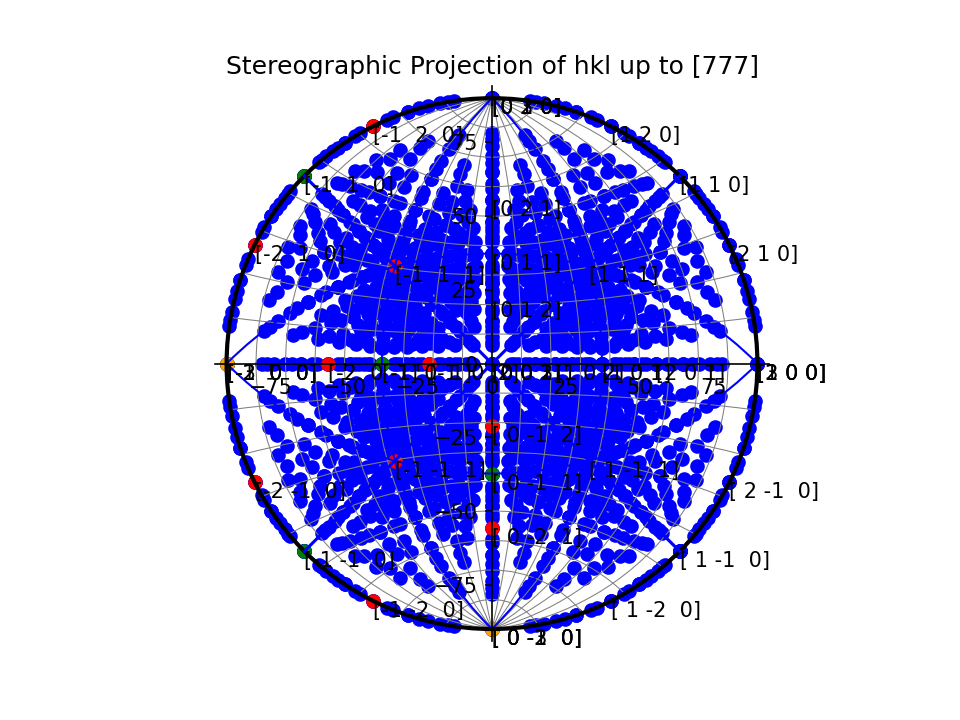

In [8]:
# ------Input ----------
hkl_max = 7
# -----------------------
h  = np.linspace(-hkl_max,hkl_max,2*hkl_max+1)  # all evaluated single Miller Indices
hkl  = np.array(list(itertools.product(h,h,h)), dtype=int) # all evaluated Miller indices
zero = np.where(np.linalg.norm(hkl)==0)
R = 90 # 90 degrees projection sphere

projected = []
reflections = []
for reflection in hkl:
    if reflection[2]>=0:
        if np.linalg.norm(reflection) >0:
            p = reflection/np.linalg.norm(reflection)*R# Coordinates on sphere surface
            projected.append(p*R/(R+p[2])) # x coordinate on stereographic projection plane
            reflections.append(reflection)
projected = np.array(projected)
reflections = np.array(reflections, dtype=int)

plt.figure()
plt.title(f'Stereographic Projection of hkl up to [{hkl_max}{hkl_max}{hkl_max}]' )
wulff_net(plt.gca(), density=10)
add_main_circles(plt.gca())
color=['orange', 'green', 'red'] + ['blue']*200
for index, spot in enumerate(projected):
    color_index = int(np.abs(reflections[index]).sum()-1)
    plt.scatter(spot[0], spot[1], color=color[color_index])
    if color_index<3:
        plt.text(spot[0], spot[1], f'{reflections[index]}',  horizontalalignment='left', verticalalignment='top')


### Stereographic Projections for Any Symmertry and Any Orientation 

We did already all the work in the earlier notebooks and now we can just plot those the projections of the allowed $\vec{g}$ vectors.

The stereographic projection is after all only a projection of allowed reflections.

Use a high ``hkl_max`` parameter (about 15) and you start seeing the Kikuchi bands (next [notebook](CH2-10-Kikuchi.ipynb))  

Also see whether you can detect the 3-fold  symmetry in [111] zone axis.

reciprocal_unit_cell
[[1.764 0.    0.   ]
 [0.    1.764 0.   ]
 [0.    0.    1.764]]
The inner potential is 84619.583kV
Magnitude of incident wave vector in material 392.0 1/nm and vacuum 398.7 1/nm
The convergence angle of 0mrad = 0.00 1/nm
Rotation angles are 0.0 deg and 90.0 deg
Center of Ewald sphere  [  0.           0.         391.99390809]
Of the 4912 tested reciprocal_unit_cell points, 4912 have an excitation error less than 20.00 1/nm
Of the 4912 possible reflection 876 are allowed.
 There are 40 allowed reflections in the zero order Laue Zone
 There are 128 allowed reflections in the first order Laue Zone
 There are 80 allowed reflections in the second order Laue Zone
 There are 628 allowed reflections in the other higher order Laue Zones
Length of zone axis vector in real space 0.567 nm
There are 0 forbidden but dynamical activated diffraction spots:
KinsCat's  "Kinematic_Scattering" finished


<IPython.core.display.Javascript object>


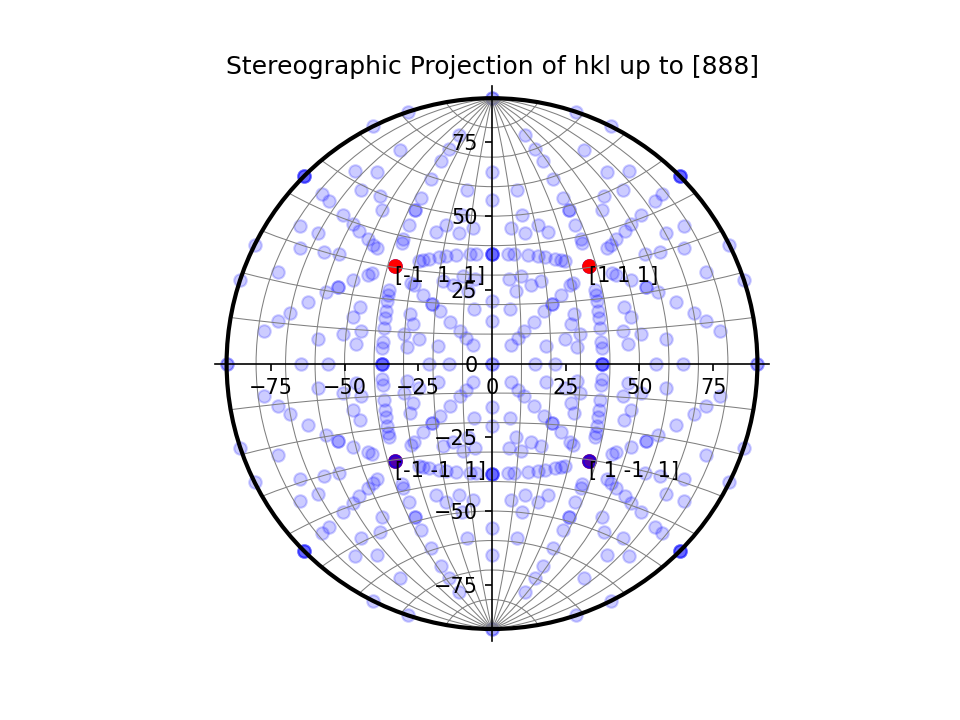

In [9]:
# ---Input ---------
hkl_max = 8
zone_axis = [0,0,1]
# ------------------

#Initialize the dictionary of the input
tags = {}
### Define Crystal
tags  = ks.structure_by_name('silicon')

### Define experimental parameters:
tags['acceleration_voltage_V'] = 200.0 *1000.0 #V
tags['new_figure'] = False
tags['plot FOV'] = 30
tags['convergence_angle_mrad'] = 0
tags['zone_hkl'] = np.array(zone_axis)  # incident neares zone axis: defines Laue Zones!!!!
tags['mistilt']  = np.array([0,0,0])  # mistilt in degrees
tags['Sg_max'] = 20 # 1/nm  maximum allowed excitation error ; This parameter is related to the thickness
tags['hkl_max'] = hkl_max   # Highest evaluated Miller indices

######################################
# Diffraction Simulation of Crystal #
######################################

 
ks.kinematic_scattering(tags, verbose = True)

hkl = tags['allowed']['g'][tags['allowed']['g'][:,2]>=0]

projected = []
reflections = []
for reflection in hkl:
    p = reflection/np.linalg.norm(reflection)*R# Coordinates on sphere surface
    projected.append(p*R/(R+p[2])) # x coordinate on stereographic projection plane
    reflections.append(reflection)
projected = np.array(projected)
reflections = np.array(reflections, dtype=int)

plt.figure()
plt.title(f'Stereographic Projection of hkl up to [{hkl_max}{hkl_max}{hkl_max}]' )
wulff_net(plt.gca(), density=10)
# add_main_circles(plt.gca())
color=['orange', 'green', 'red'] + ['blue']*100
alpha = [1, 1, 1] + [0.2]*100
for index, spot in enumerate(projected):
    color_index = int(np.abs(reflections[index]).sum()-1)
    plt.scatter(spot[0], spot[1], color=color[color_index], alpha = alpha[color_index])
    if color_index<3:
        plt.text(spot[0], spot[1], f'{reflections[index]}',  horizontalalignment='left', verticalalignment='top')



### Just a Pretty Plot

<IPython.core.display.Javascript object>


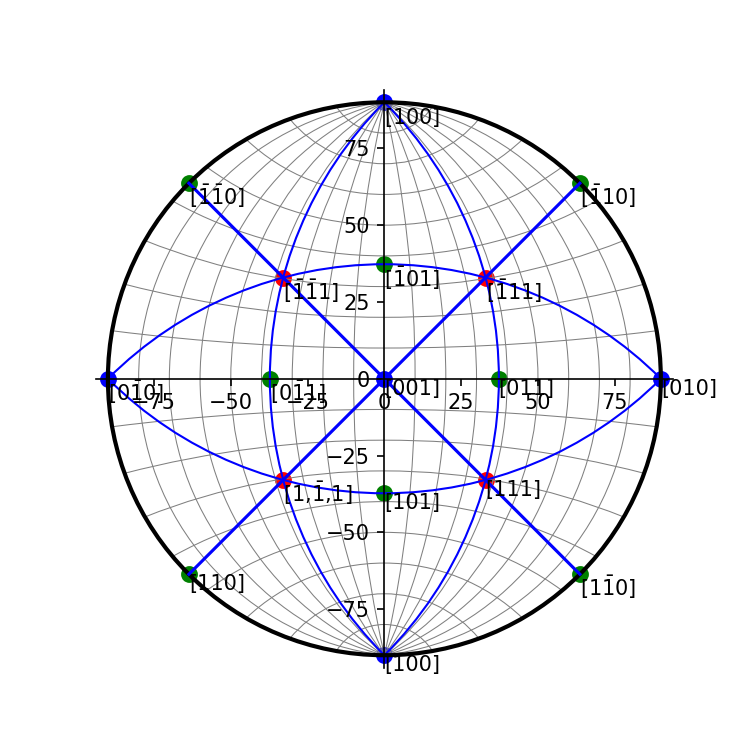

In [12]:
def add_main_planes(ax):
    ax.scatter(0, 0, color='blue', s=50)
    ax.text(0, 0, '[001]', horizontalalignment='left',verticalalignment='top')
    ax.scatter(-90, 0, color='blue', s=50)
    ax.text(-90, 0, r'[0$\bar{1}$0]', horizontalalignment='left',verticalalignment='top')
    ax.scatter(90, 0, color='blue', s=50)
    ax.text(90, 0, '[010]', horizontalalignment='left',verticalalignment='top')
    ax.scatter(0, 90, color='blue', s=50)
    ax.text(0, 90, r'[$\bar{1}$00]', horizontalalignment='left', verticalalignment='top')
    ax.scatter(0, -90, color='blue', s=50)
    ax.text(0, -90, '[100]', horizontalalignment='left', verticalalignment='top')
    
    phi_r = np.radians(45)
    r = 46.6# 1/np.tan(phi_r/2)*20
    x,y = r*np.sin(phi_r), r*np.cos(phi_r)
    ax.scatter(x,-y, color='red', s=50)
    ax.text(x,-y, '[111]', horizontalalignment='left',verticalalignment='top')
    ax.scatter(x,y, color='red', s=50)
    ax.text(x,y, r'[$\bar{1}$11]', horizontalalignment='left',verticalalignment='top')
    ax.scatter(-x,y, color='red', s=50)
    ax.text(-x,y, r'[$\bar{1}\bar{1}$1]', horizontalalignment='left',verticalalignment='top')
    ax.scatter(-x,-y, color='red', s=50)
    ax.text(-x,-y, r'[1,$\bar{1}$,1]', horizontalalignment='left',verticalalignment='top')

    ax.scatter(37.2, 0, color='green', s=50)
    ax.text(37.2, 0, '[011]', horizontalalignment='left',verticalalignment='top')
    ax.scatter(-37.2, 0, color='green', s=50)
    ax.text(-37.2, 0, r'[0$\bar{1}$1]', horizontalalignment='left',verticalalignment='top')
    ax.scatter(0, -37.2, color='green', s=50)
    ax.text(0, -37.2, r'[101]', horizontalalignment='left',verticalalignment='top')
    ax.scatter(0, 37.2, color='green', s=50)
    ax.text(0,37.2 , r'[$\bar{1}$01]', horizontalalignment='left',verticalalignment='top')
    
    phi = 45
    phi_r = np.radians(phi)
    x,y = 90*np.sin(phi_r), 90*np.cos(phi_r)

    ax.scatter(-x, -y, color='green', s=50)
    ax.text(-x, -y, '[110]', horizontalalignment='left',verticalalignment='top')
    ax.scatter(x,-y, color='green', s=50)
    ax.text(x,-y, r'[1$\bar{1}$0]', horizontalalignment='left',verticalalignment='top')
    ax.scatter(x,y, color='green', s=50)
    ax.text(x,y, r'[$\bar{1}$10]', horizontalalignment='left',verticalalignment='top')
    ax.scatter(-x,y, color='green', s=50)
    ax.text(-x,y, r'[$\bar{1}\bar{1}$0]', horizontalalignment='left',verticalalignment='top')

plt.figure(figsize=(5, 5))

wulff_net(plt.gca(), density=10)
add_main_planes(plt.gca())
add_main_circles(plt.gca())

## Summary

Lot's of information can be gained with basic crystallogrpahy tools and trigonometry.


## Navigation

- <font size = "3">  **Back: [Spot Diffraction Pattern](CH2_8-Spot_Diffraction_Pattern)** </font>
- <font size = "3">  **Next: [Kikuchi Lines](CH2_10-Kikuchi_Lines.ipynb)** </font>
- <font size = "3">  **Chapter 2: [Diffraction](CH2_00-Diffraction.ipynb)** </font>
- <font size = "3">  **List of Content: [Front](../_MSE672_Intro_TEM.ipynb)** </font>